# Predict Heart disease using machine learning

predict whether a patient has heart disease based on health attributes

steps to cover:

* 1)`Problem Definition`
* 2)`Data`
* 3) `Evaluation`
* 4) `Features`
* 5) `Modeling`
* 6) `experiment`

## 1) Problem Definition

>given clinical paramters,can we predict whether or not they have heart disease

## 2) Data

The orignal data came from  the cleavland data from UCI Machine learning repository.
https://archive.ics.uci.edu/ml/datasets/Heart+Disease

## 3) Evaluation

> If we can reach 95% accuracy, in predicting heart disease during POC, then we'll pursue the project.

## 4) Features

**create data dictionary**

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

## preparing the tools
`pandas`,`numpy` and `matplotlib` for data analysis and manipulation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#plots to appear inside notebook
%matplotlib inline 

#models from scikit-learn
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#model evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,precision_score,recall_score,f1_score,plot_roc_curve

## Load Data

In [3]:
data = pd.read_csv("data/heart-disease.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.shape #(rows,columns)

(303, 14)

## Exploratory data analysis(EDA)

1. questions to solve
2. kind of data and different types
3. missing data
4. outliers(samples that are completely different)
5. add ,change or remove features

In [5]:
#check values of each class

data["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

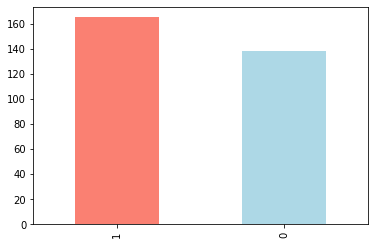

In [11]:
#plot each class

data["target"].value_counts().plot(kind="bar",color=("salmon","lightblue"));

In [12]:
#information about data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
# check if missing data
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## heart disease frequency according to sex

In [16]:
data["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [17]:
# compare sex with target

pd.crosstab(data["sex"],data["target"])

target,0,1
sex,,
0,24,72
1,114,93


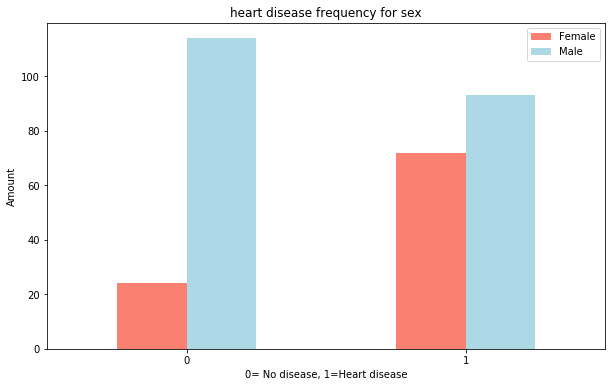

In [25]:
# create a plot of crosstab

pd.crosstab(data.target,data.sex).plot(kind="bar",figsize=(10,6),color=("salmon","lightblue"));

plt.title("heart disease frequency for sex")
plt.xlabel("0= No disease, 1=Heart disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

### Age vs Max heart rate

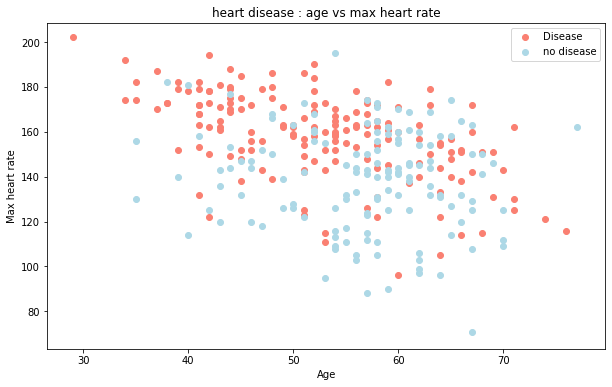

In [9]:
# create another figure

plt.figure(figsize=(10,6))

#scatter with positive

plt.scatter(data.age[data.target==1]
           ,data.thalach[data.target==1]
           ,c="salmon");

#scatter with negative

plt.scatter(data.age[data.target==0]
           ,data.thalach[data.target==0]
           ,c="lightblue");

# add some info

plt.title("heart disease : age vs max heart rate")
plt.xlabel("Age")
plt.ylabel("Max heart rate")
plt.legend(["Disease","no disease"]);

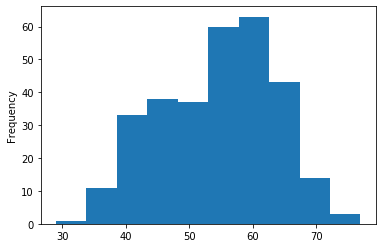

In [10]:
# distribution of age to check outliers

data["age"].plot(kind="hist");

### heartdisease frequency per chest pain type

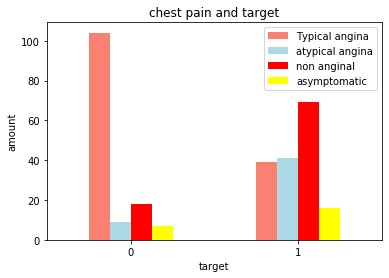

In [15]:
pd.crosstab(data.target,data.cp).plot(kind="bar",color=('salmon',"lightblue","red","yellow"));
plt.title("chest pain and target")
plt.xticks(rotation=0)
plt.ylabel("amount")
plt.legend(["Typical angina","atypical angina","non anginal","asymptomatic"]);

### correlation matrix

In [16]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


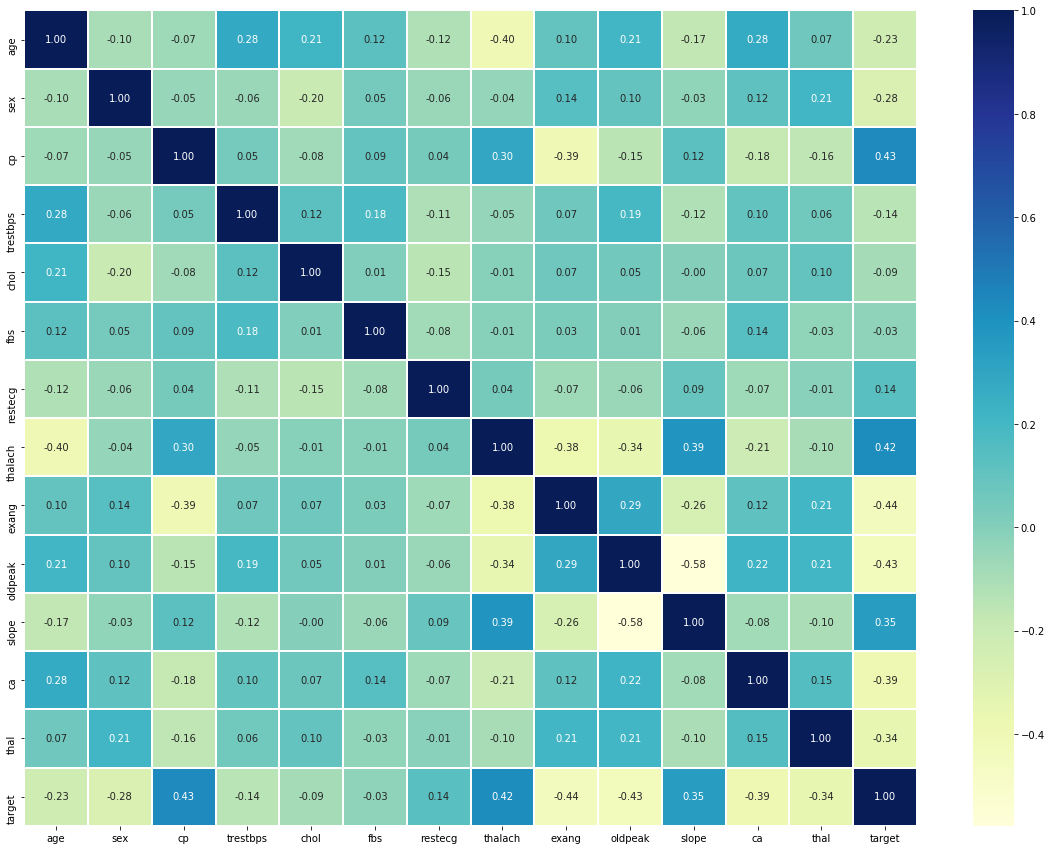

In [22]:
# plot correlation matrix using seaborn heatmap
corr_matrix = data.corr()

fig ,ax =plt.subplots(figsize=(20,15))

ax = sns.heatmap(corr_matrix
                ,annot=True
                ,linewidths=1
                ,fmt=".2f"
                ,cmap="YlGnBu");

## 5. Modeling

In [23]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
#split features and labels

X = data.drop("target",axis=1)
y = data["target"]

In [25]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [26]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [27]:
#split into train and test set

np.random.seed(42)

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [28]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [29]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

# three models to try
* 1.Logistic regression
* 2.K-nearest Neighbors classifier
* 3.RandomForestClassifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#FUNCTION TO TRAIN AND TEST ON DIFFERENT MODELS

#dictionary of models

models = {"LogisticRegression": LogisticRegression()
         ,"KNN": KNeighborsClassifier()
         ,"RandomForestClassifier": RandomForestClassifier()}

def train_test_models(models,X_train,X_test,y_train,y_test):
    """
    train and test differnt models
    models: dictionary of models
    X_train: training data (no labels)
    X_test : test data (no labels)
    y_train: training labels
    y_test: test labels
    """
    
    model_scores = dict()
    
    for model_name , model in models.items():
        np.random.seed(42)
        model.fit(X_train,y_train)
        model_scores[model_name] = model.score(X_test,y_test)
    
    return model_scores
        

In [32]:
model_scores = train_test_models(models=models
                                ,X_train=X_train
                                ,X_test=X_test
                                ,y_train= y_train
                                ,y_test = y_test)
model_scores

C:\Users\sa52031\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForestClassifier': 0.8360655737704918}

In [33]:
model_scores

{'LogisticRegression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForestClassifier': 0.8360655737704918}

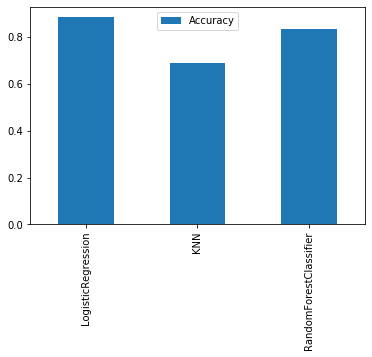

In [44]:
model_df = pd.DataFrame(model_scores
                        ,index=["Accuracy"])
model_df.T.plot(kind="bar");

## Hyperparameter tuning by hand

In [ ]:
KNeighborsClassifier()

In [47]:
#list of scores
train_scores = []
test_scores = []

#values for diff neighbors
neighbors = range(1,21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [48]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [49]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum score:75.41%


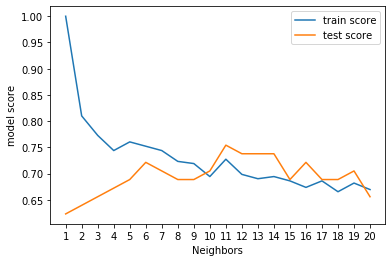

In [57]:
plt.plot(neighbors,train_scores,label="train score")
plt.plot(neighbors,test_scores,label="test score");
plt.xticks(np.arange(1,21));
plt.legend();
plt.xlabel("Neighbors")
plt.ylabel("model score")

print(f"Maximum score:{max(test_scores)*100:.2f}%")

## Hyperparamter tuning by RandomizedSearchCV
    Tune  RandomForestClassifier and LogisticRegression using RandomizedSearchCV

In [65]:
#hyperparamter grid for LogisticRegression

log_reg_grid = {"C": np.logspace(-4,4,20)
               ,"solver": ["liblinear"]}

#create hyperparameter grid for RandomForestClassifier

rf_grid = {"n_estimators": np.arange(10,100,50)
          ,"max_depth": [None,3,5,10]
          ,"min_samples_split": np.arange(2,30,2)
          ,"min_samples_leaf": np.arange(1,20,2)}

In [61]:
# tune logistic regression
np.random.seed(42)
lreg = LogisticRegression(n_jobs=1)

rs_lgreg = RandomizedSearchCV(estimator=lreg
                             ,n_iter=20
                             ,param_distributions=log_reg_grid
                             ,verbose=True)

#fit rs logreg model

rs_lgreg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=1,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [62]:
rs_lgreg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [63]:
rs_lgreg.score(X_test,y_test)

0.8852459016393442

In [66]:
#tune RandomForestClassifier
np.random.seed(42)
clf = RandomForestClassifier(n_jobs=1)

rs_clf = RandomizedSearchCV(estimator=clf
                           ,n_iter=20
                           ,param_distributions=rf_grid
                           ,verbose=True)

rs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.0s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [67]:
rs_clf.score(X_test,y_test)

0.8688524590163934

In [68]:
rs_clf.best_params_

{'n_estimators': 10,
 'min_samples_split': 14,
 'min_samples_leaf': 7,
 'max_depth': 10}

## Hyperparameter tuning with GridSearchCV

In [69]:
log_reg_grid = {"C": np.logspace(-4,4,30)
               ,"solver":["liblinear"]}

gs_log_reg = GridSearchCV(estimator=LogisticRegression()
                         ,param_grid=log_reg_grid
                         ,verbose=True)

gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.5s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04,...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.

In [70]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [72]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

## Evaluating model using:
* Precision
* recall
* f1 score
* ROC curve
* Confusion matrix
* ROC curve and AUC score

In [73]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,
plot_roc_curve,recall_score,precision_score,f1_score

In [74]:
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

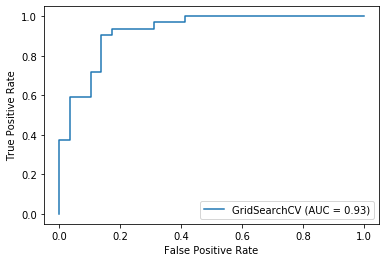

In [77]:
#plor roc curve and AUC score
plot_roc_curve(gs_log_reg,X_test,y_test);

In [78]:
#confusion matrix

conf_mat = confusion_matrix(y_test,y_preds)
conf_mat

array([[25,  4],
       [ 3, 29]], dtype=int64)

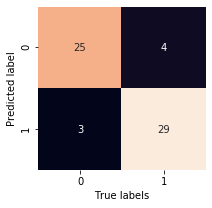

In [81]:
#plot confusion matrix using seaborn heatmap
fig , ax = plt.subplots(figsize=(3,3))

ax = sns.heatmap(conf_mat
                ,annot=True
                ,cbar=False
                );

ax.set(xlabel="True labels"
      ,ylabel="Predicted label");

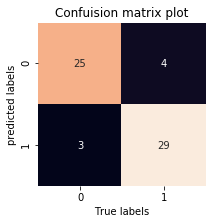

In [82]:
#function to plot Confusion matrix
def plot_confusion_matrix(y_test,y_preds):
    """
    Plot a confusion matrix
    """
    conf_mat = confusion_matrix(y_test,y_preds)
    
    fig , ax = plt.subplots(figsize=(3,3))
    
    ax = sns.heatmap(conf_mat
                    ,annot=True
                    ,cbar=False)
    ax.set(xlabel="True labels"
          ,ylabel="predicted labels"
          ,title="Confuision matrix plot")
    
plot_confusion_matrix(y_test,y_preds);
    

In [83]:
#classification report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Evaluate using cross validation


In [86]:
#check best parameters

gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [87]:
#model with best params

model = LogisticRegression(C=0.20433597178569418
                          ,solver='liblinear')

In [88]:
# cross validation accuracy

cv_accuracy = np.mean(cross_val_score(model,X,y,scoring=None))
cv_accuracy

0.8446994535519124

In [90]:
# cross validation precision
cv_precision = np.mean(cross_val_score(model,X,y,scoring="precision"))
cv_precision

0.8207936507936507

In [91]:
# cross validation recall
cv_recall = np.mean(cross_val_score(model,X,y,scoring="recall"))
cv_recall

0.9212121212121213

In [92]:
# cross validation f1-score

cv_f1 = np.mean(cross_val_score(model,X,y,scoring="f1"))
cv_f1

0.8673007976269721

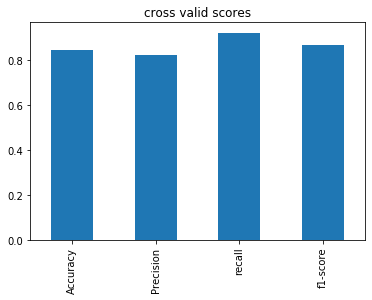

In [97]:
# plot cross validated 

cv_scores = pd.DataFrame({"Accuracy":cv_accuracy
                         ,"Precision":cv_precision
                         ,"recall":cv_recall
                         ,"f1-score":cv_f1}
                        ,index=[0])
cv_scores.T.plot(kind="bar",legend=False,title="cross valid scores");

### Feature importance

feature which contribute most to outcome of model

In [107]:
model.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [108]:
# check coef_

model.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [112]:
# match coef of features to columns

coef_df = pd.DataFrame(model.coef_,columns=[X_train.columns])
coef_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.003167,-0.860447,0.66067,-0.01157,-0.001664,0.043861,0.312758,0.024594,-0.604131,-0.568628,0.450516,-0.636099,-0.676634


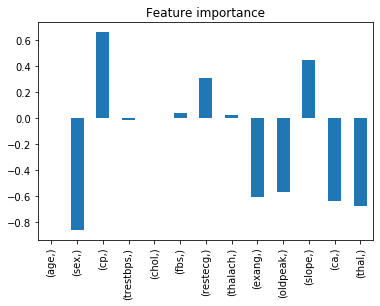

In [118]:
coef_df.T.plot(kind="bar",legend=False,title="Feature importance");

In [116]:
pd.crosstab(data["sex"],data["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [117]:
pd.crosstab(data["slope"],data["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
